# Importowanie potrzebnych bibliotek

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
from rdkit import Chem
from rdkit.Chem import PandasTools
from padelpy import from_smiles, padeldescriptor

# Utworzenie bazy PaDEL

In [ ]:
df = pd.read_excel('analiza_dla_bazy_danych_zebranych_z_literatury.xlsx')

In [ ]:
smiles_list = df.iloc[:,6].tolist()

In [ ]:
for smiles in smiles_list:
    print(smiles)

In [ ]:
# Utwórzenie DataFrame'u zawierającego molekuły i odpowiadające im ciągi SMILES
df = pd.DataFrame({
    'ROMol': [Chem.MolFromSmiles(smiles) for smiles in smiles_list],
    'SMILES': smiles_list
})

# Usunięcie wszystkich wierszy, które nie mają prawidłowej struktury molekularnej
df = df[df['ROMol'].notnull()]

print(df)

# Zapis struktur molekularnych do pliku SDF
PandasTools.WriteSDF(df, 'molecules.sdf', molColName='ROMol')

# Obliczanie deskryptorów 2D za pomocą padel-descriptor
output_file = 'Baza_danych_deskryptorów_molekularnych_typu_2D.csv'
padeldescriptor(mol_dir='molecules.sdf', d_file=output_file, d_2d=True, d_3d=False,)
#padeldescriptor(de)
# Czytanie wyników z pliku CSV
df_descriptors = pd.read_csv(output_file)

print(df_descriptors)

# Wczytanie danych z arkusza

In [64]:
df = pd.read_csv('Baza_danych_deskryptorów_molekularnych_typu_2D.csv')

In [65]:
df

,inne,Name,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,no hit,AUTOGEN_molecules_1,0,-0.9763,0.953162,48.6942,29.135102,0,0,26,...,6.235219,24.360805,2.030067,6.240876,0.000000,6.240876,1.910000e+02,14.0,0.274,60.0
1,no hit,AUTOGEN_molecules_2,0,0.4241,0.179861,65.9218,40.477481,0,0,34,...,8.031433,33.086571,1.946269,8.899515,2.545591,2.807455,1.600000e+10,28.0,2.309,82.0
2,specific hit,AUTOGEN_molecules_3,0,NaN,NaN,NaN,35.571516,0,0,26,...,11.423133,27.452629,1.960902,4.214266,0.000000,3.214266,1.300000e+10,16.0,3.969,64.0
3,specific hit,AUTOGEN_molecules_4,0,1.3847,1.917394,50.7583,23.736344,0,0,19,...,7.581974,22.508233,2.046203,2.552681,2.552681,0.000000,1.400000e+02,15.0,1.877,56.0
4,specific hit,AUTOGEN_molecules_5,0,3.5699,12.744186,92.3229,38.122758,0,0,23,...,20.944140,34.002573,2.000151,13.228016,3.109226,0.000000,5.360000e+02,24.0,4.753,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,specific hit,AUTOGEN_molecules_114,0,-2.0307,4.123742,93.4415,66.928927,0,0,65,...,6.126821,50.424213,1.939393,24.149638,20.533171,0.000000,2.221000e+03,27.0,2.790,104.0
114,no hit,AUTOGEN_molecules_115,0,2.1717,4.716281,69.8819,41.220274,0,0,35,...,9.314309,31.899449,1.876438,22.089774,11.345471,0.000000,5.380000e+02,21.0,2.985,74.0
115,no hit,AUTOGEN_molecules_116,0,2.2038,4.856734,56.1287,31.939516,0,0,26,...,10.921303,26.419969,1.887141,22.130903,11.338231,0.000000,3.430000e+02,15.0,1.605,56.0
116,specific hit,AUTOGEN_molecules_117,0,4.1103,16.894566,114.7052,57.800653,0,0,47,...,7.832292,52.644856,2.024802,15.578689,11.896657,0.000000,1.723000e+03,36.0,4.227,134.0


# Usunięcie wierszy z pustymi wartościami

In [66]:
# Usunięcie wierszy zawierających jakiekolwiek puste wartości
df = df.dropna()

# Sprawdzenie, czy wszystkie brakujące wartości zostały usunięte
print(df.isnull().sum())


inne      0
Name      0
nAcid     0
ALogP     0
ALogp2    0
         ..
WTPT-5    0
WPATH     0
WPOL      0
XLogP     0
Zagreb    0
Length: 1446, dtype: int64


In [67]:
df = df.reset_index(drop=True) #ponowna indeksacja wierszy
df

,inne,Name,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,no hit,AUTOGEN_molecules_1,0,-0.9763,0.953162,48.6942,29.135102,0,0,26,...,6.235219,24.360805,2.030067,6.240876,0.000000,6.240876,191.0,14.0,0.274,60.0
1,specific hit,AUTOGEN_molecules_4,0,1.3847,1.917394,50.7583,23.736344,0,0,19,...,7.581974,22.508233,2.046203,2.552681,2.552681,0.000000,140.0,15.0,1.877,56.0
2,specific hit,AUTOGEN_molecules_5,0,3.5699,12.744186,92.3229,38.122758,0,0,23,...,20.944140,34.002573,2.000151,13.228016,3.109226,0.000000,536.0,24.0,4.753,86.0
3,specific hit,AUTOGEN_molecules_6,0,1.0142,1.028602,104.0747,60.041411,0,0,52,...,6.964706,50.028579,2.001143,15.477906,11.815888,0.000000,1596.0,32.0,5.158,118.0
4,specific hit,AUTOGEN_molecules_7,0,4.0144,16.115407,106.4439,48.205516,0,0,33,...,16.356275,41.259387,1.964733,15.051793,4.999399,0.000000,876.0,38.0,5.682,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,specific hit,AUTOGEN_molecules_114,0,-2.0307,4.123742,93.4415,66.928927,0,0,65,...,6.126821,50.424213,1.939393,24.149638,20.533171,0.000000,2221.0,27.0,2.790,104.0
92,no hit,AUTOGEN_molecules_115,0,2.1717,4.716281,69.8819,41.220274,0,0,35,...,9.314309,31.899449,1.876438,22.089774,11.345471,0.000000,538.0,21.0,2.985,74.0
93,no hit,AUTOGEN_molecules_116,0,2.2038,4.856734,56.1287,31.939516,0,0,26,...,10.921303,26.419969,1.887141,22.130903,11.338231,0.000000,343.0,15.0,1.605,56.0
94,specific hit,AUTOGEN_molecules_117,0,4.1103,16.894566,114.7052,57.800653,0,0,47,...,7.832292,52.644856,2.024802,15.578689,11.896657,0.000000,1723.0,36.0,4.227,134.0


# Klasyfikatory deskryptorów

In [55]:
from sklearn.ensemble import RandomForestClassifier

def feature_selection(data_path):
    # Wczytaj dane
    data = pd.read_csv(data_path)
    data = data.dropna()
    data = data[(data.iloc[:, 0] == 'no hit') | (data.iloc[:, 0] == 'specific hit')]
    # Podziel dane na cechy i etykiety
    X = data.iloc[:, 2:]  # deskryptory zaczynają się od trzeciej kolumny
    y = data.iloc[:, 0]  # etykieta klasy to pierwsza kolumna

    # Utwórz klasyfikator lasu losowego
    clf = RandomForestClassifier(max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42)
    clf.fit(X, y)

    # Uzyskaj ważność cech
    feature_importances = clf.feature_importances_

    # Utwórz DataFrame pokazujący ważność cech
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    })

    # Posortuj DataFrame według ważności cech
    importance_df = importance_df.sort_values('Importance', ascending=False)

    # Uzyskaj listę 50 najważniejszych cech
    top_100_features = importance_df['Feature'].head(50).tolist()

    return top_100_features

# Użyj funkcji i wydrukuj 50 najważniejszych cech
print(feature_selection('Baza_danych_deskryptorów_molekularnych_typu_2D.csv'))

['CrippenLogP', 'ATS2m', 'ZMIC4', 'mindO', 'ATS3m', 'GATS2m', 'ATS1m', 'piPC7', 'ZMIC5', 'VP-0', 'MAXDP2', 'ATS4m', 'ZMIC1', 'EE_Dt', 'piPC10', 'GATS1i', 'ATS7m', 'AATS6m', 'piPC3', 'SP-6', 'ATSC2p', 'AMW', 'ATS5m', 'ATSC3s', 'SpMax7_Bhm', 'AATS7p', 'AATS6v', 'ATS6m', 'MLFER_L', 'SpMax_Dt', 'AATS6e', 'ATSC3e', 'MIC1', 'SpMin8_Bhm', 'AATS0v', 'ETA_Eta_B_RC', 'ETA_Eta', 'MATS2p', 'SIC5', 'ATSC0m', 'ETA_EtaP_F_L', 'ASP-2', 'MLFER_BH', 'AATS2p', 'SpMax6_Bhm', 'TPC', 'SRW4', 'SpDiam_Dt', 'maxHBa', 'SpAbs_Dzs']


# Wybór kolumn numerycznych do analiz

In [68]:
all = df.iloc[:, 3:].columns

In [69]:
all.to_list

<bound method IndexOpsMixin.tolist of Index(['ALogP', 'ALogp2', 'AMR', 'apol', 'naAromAtom', 'nAromBond', 'nAtom',
       'nHeavyAtom', 'nH', 'nB',
       ...
       'AMW', 'WTPT-1', 'WTPT-2', 'WTPT-3', 'WTPT-4', 'WTPT-5', 'WPATH',
       'WPOL', 'XLogP', 'Zagreb'],
      dtype='object', length=1443)>

In [70]:
a1 = ['ATS2m', 'CrippenLogP', 'ZMIC4', 'MAXDP2', 'SpMin8_Bhm', 'VP-0', 'AATS6m', 'AATS6v', 'ETA_Eta', 'ATS4m', 'AATS2p', 'ASP-2', 'AMW', 'ZMIC5', 'GATS1i', 'ATS5m', 'SIC5', 'ATS1m', 'ETA_Eta_B_RC', 'maxHBa', 'AATS8i', 'ATSC0e', 'piPC4', 'SpMin1_Bhv', 'ATSC3s', 'GATS2m', 'ATS7m', 'piPC7', 'AATSC0i', 'MATS1i', 'ATSC7i', 'ETA_Eta_B', 'SpMAD_Dt', 'MPC9', 'SpMax1_Bhm', 'SpAD_Dzi', 'BIC0', 'GGI4', 'ATSC3p', 'AATS4v', 'piPC5', 'ALogP', 'VE2_Dzv', 'ATSC3i', 'AATS0v', 'ZMIC1', 'MATS7s', 'AATSC1i', 'ATSC7p', 'piPC8', 'ATS8i', 'SpMin2_Bhe', 'AATS2m', 'ATSC6s', 'MATS6p', 'AATS7p', 'GATS2c', 'mindO', 'SpDiam_Dt', 'MIC1', 'SpAD_Dze', 'BCUTc-1h', 'ATSC6c', 'ATS3m', 'SpMax5_Bhm', 'SC-6', 'maxHBd', 'GATS2i', 'ZMIC3', 'ETA_Eta_L', 'MWC3', 'MWC7', 'MLFER_BH', 'ETA_EtaP', 'SpMax_Dt', 'TopoPSA', 'AATSC0p', 'AATS8v', 'SCH-6', 'MPC5', 'SM1_Dzi', 'SpMax1_Bhe', 'ATS6m', 'SpMax2_Bhe', 'ECCEN', 'piPC2', 'ATSC1c', 'ETA_Epsilon_5', 'ASP-5', 'AATS7e', 'AATS0i', 'EE_Dze', 'SP-4', 'AATS5p', 'MATS2m', 'MATS7v', 'MATS2p', 'MATS6m', 'ETA_Psi_1', 'ETA_Eta_R']
b1 = ['ATS8i', 'ATS8s', 'AATS2m', 'AATS5m', 'AATS6m', 'AATS0v', 'AATS1v', 'AATS2v', 'AATS4v', 'AATS7v', 'AATS8v', 'AATS2e', 'AATS3e', 'AATS6e', 'AATS2p', 'AATS7p', 'AATS3i', 'ATSC4c', 'ATSC2m', 'ATSC6m', 'ATSC8m', 'ATSC0v', 'ATSC4v', 'ATSC2e', 'ATSC3e', 'ATSC8e', 'ATSC0p', 'ATSC2p', 'ATSC7p', 'ATSC3i', 'ATSC4i', 'ATSC7i', 'ATSC1s', 'ATSC3s', 'AATSC4c', 'AATSC4m', 'AATSC6m', 'AATSC7v', 'AATSC4e', 'AATSC8e', 'AATSC1p', 'AATSC1i', 'AATSC3s', 'MATS4c', 'MATS3m', 'MATS4m', 'MATS5m', 'MATS1v', 'MATS2p', 'MATS3p', 'MATS6p', 'MATS7p', 'MATS4i', 'MATS4s', 'GATS2m', 'GATS4m', 'GATS4v', 'GATS2p', 'GATS1i', 'GATS2i', 'GATS5i', 'GATS3s', 'SM1_Dzm', 'SpMax_Dzv', 'VR2_Dzi', 'SpMax6_Bhm', 'SpMax7_Bhm', 'SpMin1_Bhv', 'SdssC', 'minHBa', 'mindO', 'maxHBa', 'maxwHBa', 'maxdO', 'hmax', 'gmax', 'LipoaffinityIndex', 'MAXDP', 'MAXDN2', 'MAXDP2', 'ETA_Epsilon_4', 'ETA_Epsilon_5', 'ETA_Eta', 'ETA_Eta_R_L', 'ETA_EtaP_F_L', 'fragC', 'SIC5', 'CIC0', 'CIC2', 'CIC5', 'BIC0', 'BIC2', 'MIC1', 'MIC3', 'MIC5', 'ZMIC0', 'ZMIC1', 'ZMIC2', 'ZMIC3', 'ZMIC4']

In [71]:
a2 = ['CrippenLogP', 'AMW', 'ALogP', 'TopoPSA', 'maxHBa', 'maxHBd', 'MWC3', 'ECCEN', 'piPC4', 'MWC7', 'ETA_EtaP', 'ETA_Epsilon_5', 'MLFER_BH', 'SpMax_Dt', 'mindO']
a3 = ['CrippenLogP', 'ATS2m', 'ZMIC4', 'mindO', 'GATS2m', 'piPC7', 'VP-0', 'MAXDP2', 'EE_Dt', 'GATS1i', 'AATS6m', 'piPC3', 'SP-6', 'ATSC2p', 'AMW', 'SpMax7_Bhm', 'AATS7p', 'MLFER_L', 'SpMax_Dt', 'ATSC3e', 'SpMin8_Bhm', 'ETA_Eta', 'SIC5', 'ETA_EtaP_F_L', 'MLFER_BH', 'TPC', 'SRW4', 'SpDiam_Dt', 'maxHBa', 'piPC5', 'MATS4i', 'hmax', 'minwHBa', 'SP-3', 'AATSC3s', 'ETA_Eta_B', 'WPOL', 'GATS1e', 'AATS2m', 'BCUTc-1h', 'VPC-6', 'BIC0', 'JGI1', 'VC-6', 'ETA_Alpha', 'nH', 'ATSC3p', 'ETA_Eta_L', 'SRW6', 'GATS7v']


In [72]:
a4  =[
 'ATSC3m',
 'nF',
 'SPC-4',
 'AATSC3m',
 'GGI2',
 'nX',
 'ATS7s',
 'SC-5',
 'SPC-5',
 'ATS4s',
 'WPOL',
 'MDEO-12',
 'ATS8s',
 'SPC-6',
 'ATS5s',
 'ATS2s',
 'SC-6',
 'ATS3s',
 'ATSC0i',
 'ATSC5m',
 'MATS3m',
 'AATS7s',
 'ZMIC5',
 'GGI6',
 'ATS6s',
 'MDEC-44',
 'nBase',
 'MPC3',
 'AATS8s',
 'EE_Dt',
 'Mse',
 'MW',
 'ATS2m',
 'nBondsS3',
 'AATSC5m',
 'Kier1',
 'AATS3s',
 'MPC2',
 'ZMIC1',
 'ZMIC3',
 'ZMIC0',
 'ZMIC4',
 'Zagreb',
 'WTPT-3',
 'GGI1',
 'AATS0i',
 'nHeavyAtom',
 'GGI3',
 'Mi',
 'GGI4'
]


In [73]:
numerical_columns = a1

In [74]:
numerical_columns

['ATS2m',
 'CrippenLogP',
 'ZMIC4',
 'MAXDP2',
 'SpMin8_Bhm',
 'VP-0',
 'AATS6m',
 'AATS6v',
 'ETA_Eta',
 'ATS4m',
 'AATS2p',
 'ASP-2',
 'AMW',
 'ZMIC5',
 'GATS1i',
 'ATS5m',
 'SIC5',
 'ATS1m',
 'ETA_Eta_B_RC',
 'maxHBa',
 'AATS8i',
 'ATSC0e',
 'piPC4',
 'SpMin1_Bhv',
 'ATSC3s',
 'GATS2m',
 'ATS7m',
 'piPC7',
 'AATSC0i',
 'MATS1i',
 'ATSC7i',
 'ETA_Eta_B',
 'SpMAD_Dt',
 'MPC9',
 'SpMax1_Bhm',
 'SpAD_Dzi',
 'BIC0',
 'GGI4',
 'ATSC3p',
 'AATS4v',
 'piPC5',
 'ALogP',
 'VE2_Dzv',
 'ATSC3i',
 'AATS0v',
 'ZMIC1',
 'MATS7s',
 'AATSC1i',
 'ATSC7p',
 'piPC8',
 'ATS8i',
 'SpMin2_Bhe',
 'AATS2m',
 'ATSC6s',
 'MATS6p',
 'AATS7p',
 'GATS2c',
 'mindO',
 'SpDiam_Dt',
 'MIC1',
 'SpAD_Dze',
 'BCUTc-1h',
 'ATSC6c',
 'ATS3m',
 'SpMax5_Bhm',
 'SC-6',
 'maxHBd',
 'GATS2i',
 'ZMIC3',
 'ETA_Eta_L',
 'MWC3',
 'MWC7',
 'MLFER_BH',
 'ETA_EtaP',
 'SpMax_Dt',
 'TopoPSA',
 'AATSC0p',
 'AATS8v',
 'SCH-6',
 'MPC5',
 'SM1_Dzi',
 'SpMax1_Bhe',
 'ATS6m',
 'SpMax2_Bhe',
 'ECCEN',
 'piPC2',
 'ATSC1c',
 'ETA_Epsilon_5',
 

In [75]:
print(df.isnull().sum())

inne      0
Name      0
nAcid     0
ALogP     0
ALogp2    0
         ..
WTPT-5    0
WPATH     0
WPOL      0
XLogP     0
Zagreb    0
Length: 1446, dtype: int64


In [76]:
df[numerical_columns].dropna()

,ATS2m,CrippenLogP,ZMIC4,MAXDP2,SpMin8_Bhm,VP-0,AATS6m,AATS6v,ETA_Eta,ATS4m,...,AATS0i,EE_Dze,SP-4,AATS5p,MATS2m,MATS7v,MATS2p,MATS6m,ETA_Psi_1,ETA_Eta_R
0,2909.336253,1.50720,17.068435,1.137037,0.509276,7.402499,17.570977,97.226336,8.47226,2104.613267,...,164.587339,27.257688,3.436760,1.047142,-0.051066,-0.172068,0.066399,-0.115448,0.63043,14.61484
1,2585.631992,2.54540,18.648078,3.371204,0.245498,5.988665,6.056496,64.597619,5.58984,1721.552757,...,154.354530,20.183620,3.259983,1.008272,-0.088294,1.331990,-0.140510,0.322297,0.62992,13.07157
2,10467.190137,7.02969,68.897826,2.314491,0.155350,14.728194,453.483714,302.334759,20.42608,20551.670770,...,146.728389,48.023083,4.545366,2.393579,-0.029502,-0.018684,-0.005857,0.050827,0.90206,25.63326
3,6966.187640,6.20638,34.031930,6.179505,1.102295,15.190536,58.935287,175.699603,24.79443,7746.422827,...,161.162299,109.940515,6.061803,1.299934,0.102266,0.018484,0.013837,-0.286746,0.60556,43.21064
4,11820.091962,6.24100,66.872083,3.849854,0.848137,17.559672,169.282920,219.004318,31.97102,24358.765612,...,153.033128,70.000214,5.516177,1.715849,0.022127,-0.261637,0.135771,-0.551252,0.81818,38.58725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,6611.871442,3.61440,47.153861,5.646445,1.359783,17.135496,50.624962,141.097632,30.99710,6756.712819,...,167.726408,154.043237,4.371320,0.999048,0.007303,0.084647,0.021099,0.005581,0.52782,43.30662
92,6044.255911,3.04620,55.388988,5.278519,0.506992,12.559201,76.150080,202.640752,20.44367,8139.161515,...,166.454887,55.268468,3.206796,1.110387,-0.045927,-0.232717,0.032282,-0.030716,0.53354,28.01893
93,4968.292381,1.88070,49.918399,4.647269,0.083923,9.948470,73.117665,159.315775,13.05347,5933.943021,...,166.770464,42.569734,2.185660,1.232378,-0.163083,0.089278,0.083621,0.181953,0.50776,19.61845
94,7675.886890,5.13644,52.401518,6.309517,1.096100,15.232352,91.848083,239.845224,22.03427,7877.515596,...,157.398468,104.475402,6.940488,1.340005,0.213748,-0.268374,0.101952,-0.243070,0.60918,46.37936


In [320]:
print(df[numerical_columns].isin([np.nan, np.inf, -np.inf]).sum())

nAcid                0
ALogP                0
ALogp2               0
AMR                  0
apol                 0
naAromAtom           0
nAromBond            0
nAtom                0
nHeavyAtom           0
nH                   0
nB                   0
nC                   0
nN                   0
nO                   0
nS                   0
nP                   0
nF                   0
nCl                  0
nBr                  0
nI                   0
nX                   0
ATS0m                0
ATS1m                0
ATS2m                0
ATS3m                0
ATS4m                0
ATS5m                0
ATS6m                0
ATS7m                0
ATS8m                0
ATS0v                0
ATS1v                0
ATS2v                0
ATS3v                0
ATS4v                0
ATS5v                0
ATS6v                0
ATS7v                0
ATS8v                0
ATS0e                0
ATS1e                0
ATS2e                0
ATS3e                0
ATS4e      

In [78]:
df[numerical_columns]

,ATS2m,CrippenLogP,ZMIC4,MAXDP2,SpMin8_Bhm,VP-0,AATS6m,AATS6v,ETA_Eta,ATS4m,...,AATS0i,EE_Dze,SP-4,AATS5p,MATS2m,MATS7v,MATS2p,MATS6m,ETA_Psi_1,ETA_Eta_R
0,2909.336253,1.50720,17.068435,1.137037,0.509276,7.402499,17.570977,97.226336,8.47226,2104.613267,...,164.587339,27.257688,3.436760,1.047142,-0.051066,-0.172068,0.066399,-0.115448,0.63043,14.61484
1,2585.631992,2.54540,18.648078,3.371204,0.245498,5.988665,6.056496,64.597619,5.58984,1721.552757,...,154.354530,20.183620,3.259983,1.008272,-0.088294,1.331990,-0.140510,0.322297,0.62992,13.07157
2,10467.190137,7.02969,68.897826,2.314491,0.155350,14.728194,453.483714,302.334759,20.42608,20551.670770,...,146.728389,48.023083,4.545366,2.393579,-0.029502,-0.018684,-0.005857,0.050827,0.90206,25.63326
3,6966.187640,6.20638,34.031930,6.179505,1.102295,15.190536,58.935287,175.699603,24.79443,7746.422827,...,161.162299,109.940515,6.061803,1.299934,0.102266,0.018484,0.013837,-0.286746,0.60556,43.21064
4,11820.091962,6.24100,66.872083,3.849854,0.848137,17.559672,169.282920,219.004318,31.97102,24358.765612,...,153.033128,70.000214,5.516177,1.715849,0.022127,-0.261637,0.135771,-0.551252,0.81818,38.58725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,6611.871442,3.61440,47.153861,5.646445,1.359783,17.135496,50.624962,141.097632,30.99710,6756.712819,...,167.726408,154.043237,4.371320,0.999048,0.007303,0.084647,0.021099,0.005581,0.52782,43.30662
92,6044.255911,3.04620,55.388988,5.278519,0.506992,12.559201,76.150080,202.640752,20.44367,8139.161515,...,166.454887,55.268468,3.206796,1.110387,-0.045927,-0.232717,0.032282,-0.030716,0.53354,28.01893
93,4968.292381,1.88070,49.918399,4.647269,0.083923,9.948470,73.117665,159.315775,13.05347,5933.943021,...,166.770464,42.569734,2.185660,1.232378,-0.163083,0.089278,0.083621,0.181953,0.50776,19.61845
94,7675.886890,5.13644,52.401518,6.309517,1.096100,15.232352,91.848083,239.845224,22.03427,7877.515596,...,157.398468,104.475402,6.940488,1.340005,0.213748,-0.268374,0.101952,-0.243070,0.60918,46.37936


# Normalizacja danych

In [77]:
# Standaryzacja
data = df[numerical_columns]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [337]:
data_scaled

array([[-1.21340641, -0.51989369, -1.16103902, ..., -0.30941171,
         0.8196312 , -1.07805159],
       [-1.32104044, -0.12762212, -1.04675369, ...,  1.55567598,
         0.81456221, -1.16668845],
       [ 1.29963524,  1.56671374,  2.58875762, ...,  0.39903036,
         3.51941692, -0.44521477],
       ...,
       [-0.52878845, -0.37877114,  1.215618  , ...,  0.95771729,
        -0.39961083, -0.79067203],
       [ 0.37150651,  0.85137166,  1.39526879, ..., -0.85316691,
         0.60842314,  0.74632596],
       [-0.219216  ,  0.21601791, -0.67763671, ..., -0.2958484 ,
         0.17149577,  0.40588156]])

# Zdefiniowanie siatki hiperparametrów do przeszukania

In [37]:
def train_model(data_path):
    # Wczytaj dane
    data = pd.read_csv(data_path)
    data = data[(data.iloc[:, 1] == 'no hit') | (data.iloc[:, 0] == 'specific hit')]
    data = data.dropna()
    # Podziel dane na cechy i etykiety
    X = data[numerical_columns]  # deskryptory zaczynają się od trzeciej kolumny
    y = data.iloc[:, 0]  # etykieta klasy to pierwsza kolumna


    # Podziel dane na zestawy treningowe i testowe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Zastąp nieskończoności wartościami NaN
    X_train = X_train.replace([np.inf, -np.inf], np.nan)
    X_test = X_test.replace([np.inf, -np.inf], np.nan)
    
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestClassifier
    
    # Zdefiniuj model
    clf = RandomForestClassifier()
    
    # Zdefiniuj siatkę hiperparametrów do przeszukania
    param_grid = {
        'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
        'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, None],
        'min_samples_split': [2, 5, 10, 15, 20],
        'min_samples_leaf': [1, 2, 4, 6, 8, 10],
        'bootstrap': [True, False],
        'max_features': ['auto', 'sqrt', 'log2', None],
        'criterion': ['gini', 'entropy']
    }
    
    # Zdefiniuj obiekt GridSearchCV
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
    
    # Dopasuj GridSearchCV do danych treningowych
    grid_search.fit(X_train, y_train)
    
    # Wyświetl najlepsze parametry
    print('Best parameters:', grid_search.best_params_)
    
    # Wyświetl najlepszy wynik
    print('Best score:', grid_search.best_score_)
    

    return clf
#########################################################################################################
#najdokładniejszy

In [262]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import numpy as np

def train_model(data_path):
    # Wczytaj dane
    data = pd.read_csv(data_path)
    data = data[(data.iloc[:, 1] == 'no hit') | (data.iloc[:, 1] == 'specific hit')]
    data = data.dropna()

    # Podziel dane na cechy i etykiety
    X = data[numerical_columns]  # deskryptory 
    y = data.iloc[:, 1]  # etykieta klasy to pierwsza kolumna

    print(X)

    # Podziel dane na zestawy treningowe i testowe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Skaluj dane
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Zdefiniuj model
    clf = RandomForestClassifier()

    # Zdefiniuj siatkę hiperparametrów do przeszukania
    param_dist = {
        'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400],
        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
        'min_samples_split': [2, 5, 10, 15, 20],
        'min_samples_leaf': [1, 2, 4, 6, 8, 10],
        'bootstrap': [True, False],
        'max_features': ['auto'],
        'criterion': ['gini', 'entropy']
    }

    # Inicjalizuj RandomizedSearchCV
    random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=20, cv=10,)

    # Dopasuj RandomizedSearchCV do danych
    random_search.fit(X_train, y_train)

    # Wydrukuj najlepsze parametry
    print('Best parameters:', random_search.best_params_)

    # Use the best estimator to predict on test data
    clf_best = random_search.best_estimator_
    y_pred = clf_best.predict(X_test)

    # Sprawdź, jak dobrze nasz model sobie poradził
    print(classification_report(y_test, y_pred))
    
    # Wydrukuj macierz pomyłek
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # Przeprowadź walidację krzyżową
    scores = cross_val_score(clf_best, X_train, y_train, cv=10)
    
    # Wydrukuj wyniki walidacji krzyżowej
    print('Cross-validation scores:', scores)
    print('Average cross-validation score:', scores.mean())

    return clf_best


In [81]:
def train_model(data_path):
    # Wczytaj dane
    data = pd.read_csv(data_path)
    data = data[(data.iloc[:, 0] == 'no hit') | (data.iloc[:, 0] == 'specific hit')]
    data = data.dropna()
    #scaler = StandardScaler()
    #data = scaler.fit_transform(data)
    # Podziel dane na cechy i etykiety
    X = scaler.fit_transform(data[numerical_columns])  # deskryptory 
    y = data.iloc[:, 1]  # etykieta klasy to pierwsza kolumna

    # Podziel dane na zestawy treningowe i testowe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Zdefiniuj model z określonymi parametrami
    clf = RandomForestClassifier(n_estimators=500, 
                                 min_samples_split=20, 
                                 min_samples_leaf=1, 
                                 max_features='auto', 
                                 max_depth=12, 
                                 criterion='entropy', 
                                 bootstrap=True, 
                                )

    # Dopasuj model do danych treningowych
    clf.fit(X_train, y_train)

    # Dokonaj prognoz na danych testowych
    y_pred = clf.predict(X_test)

    # Sprawdź, jak dobrze nasz model sobie poradził
    print(classification_report(y_test, y_pred))
    
    # Przeprowadź walidację krzyżową
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    
    # Wydrukuj macierz pomyłek
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    
    # Wydrukuj wyniki walidacji krzyżowej
    print('Cross-validation scores:', scores)
    print('Average cross-validation score:', scores.mean())

    return clf


In [80]:


def train_model(data_path):
    # Wczytaj dane
    data = pd.read_csv(data_path)
    data = data[(data.iloc[:, 1] == 'no hit') | (data.iloc[:, 1] == 'specific hit')]
    data = data.dropna()
    # Podziel dane na cechy i etykiety
    X = data[numerical_columns]  # deskryptory zaczynają się od trzeciej kolumny
    y = data.iloc[:, 1]  # etykieta klasy to pierwsza kolumna

    # Podziel dane na zestawy treningowe i testowe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

    # Zastąp nieskończoności wartościami NaN
    X_train = X_train.replace([np.inf, -np.inf], np.nan)
    X_test = X_test.replace([np.inf, -np.inf], np.nan)

    # Inicjalizuj i dopasuj RandomOverSampler
    ros = RandomOverSampler(random_state=42)
    X_train, y_train = ros.fit_resample(X_train, y_train)
    
    # Zdefiniuj model
    clf = RandomForestClassifier()

    # Zdefiniuj siatkę hiperparametrów do przeszukania
    param_dist = {
        'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
        'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, None],
        'min_samples_split': [2, 5, 10, 15, 20],
        'min_samples_leaf': [1, 2, 4, 6, 8, 10],
        'bootstrap': [True, False],
        'max_features': ['auto', 'sqrt', 'log2', None],
        'criterion': ['gini', 'entropy']
    }

    # Inicjalizuj RandomizedSearchCV
    random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, cv=5,)

    # Dopasuj RandomizedSearchCV do danych
    random_search.fit(X_train, y_train)

    # Wydrukuj najlepsze parametry
    print('Best parameters:', random_search.best_params_)

    # Najlepszy estymator do przewidywania
    clf_best = random_search.best_estimator_
    y_pred = clf_best.predict(X_test)

    # Sprawdź, jak dobrze nasz model sobie poradził
    print(classification_report(y_test, y_pred))
    
    return clf_best

############################################################
#dokładny ale randomowy

In [72]:
numerical_columns

['ATSC3m',
 'nF',
 'SPC-4',
 'AATSC3m',
 'GGI2',
 'nX',
 'ATS7s',
 'SC-5',
 'SPC-5',
 'ATS4s',
 'WPOL',
 'MDEO-12',
 'ATS8s',
 'SPC-6',
 'ATS5s',
 'ATS2s',
 'SC-6',
 'ATS3s',
 'ATSC0i',
 'ATSC5m',
 'MATS3m',
 'AATS7s',
 'ZMIC5',
 'GGI6',
 'ATS6s',
 'MDEC-44',
 'nBase',
 'MPC3',
 'AATS8s',
 'EE_Dt',
 'Mse',
 'MW',
 'ATS2m',
 'nBondsS3',
 'AATSC5m',
 'Kier1',
 'AATS3s',
 'MPC2',
 'ZMIC1',
 'ZMIC3',
 'ZMIC0',
 'ZMIC4',
 'Zagreb',
 'WTPT-3',
 'GGI1',
 'AATS0i',
 'nHeavyAtom',
 'GGI3',
 'Mi',
 'GGI4']

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

def train_model(data_path):
    # Wczytaj dane
    data = pd.read_csv(data_path)
    data = data[(data.iloc[:, 0] == 'no hit') | (data.iloc[:, 0] == 'specific hit')]
    data = data.dropna()

    # Podziel dane na cechy i etykiety
    X = data[numerical_columns]  # deskryptory 
    y = data.iloc[:, 0]  # etykieta klasy to pierwsza kolumna

    # Podziel dane na zestawy treningowe i testowe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Skaluj dane
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Zdefiniuj model z określonymi parametrami
    clf = RandomForestClassifier(n_estimators=200, 
                                 min_samples_split=10, 
                                 min_samples_leaf=1, 
                                 max_features='auto', 
                                 max_depth=10, 
                                 criterion='entropy', 
                                 bootstrap=True, 
                                 class_weight='balanced')

    # Dopasuj model do danych treningowych
    clf.fit(X_train, y_train)

    # Dokonaj prognoz na danych testowych
    y_pred = clf.predict(X_test)

    # Sprawdź, jak dobrze nasz model sobie poradził
    print(classification_report(y_test, y_pred))
    
    # Przeprowadź walidację krzyżową
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    
    # Wydrukuj wyniki walidacji krzyżowej
    print('Cross-validation scores:', scores)
    print('Average cross-validation score:', scores.mean())

    return clf


# Najlepszy wynik

In [113]:
model = train_model('Baza_danych_deskryptorów_molekularnych_typu_2D.csv')

/Users/Karez/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Karez/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

      no hit       0.67      0.86      0.75         7
specific hit       0.88      0.70      0.78        10

    accuracy                           0.76        17
   macro avg       0.77      0.78      0.76        17
weighted avg       0.79      0.76      0.77        17



/Users/Karez/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Karez/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Karez/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

Cross-validation scores: [0.92857143 0.85714286 0.78571429 0.61538462 0.38461538]
Average cross-validation score: 0.7142857142857142


# PCA

In [102]:

# Wykonanie analizy PCA
pca = PCA()
principalComponents = pca.fit_transform(data_scaled)


Wariancja wyjaśniona przez główną składową 1: 37.41%
Wariancja wyjaśniona przez główną składową 2: 10.92%
Wariancja wyjaśniona przez główną składową 3: 7.52%
Wariancja wyjaśniona przez główną składową 4: 5.45%
Wariancja wyjaśniona przez główną składową 5: 4.54%
Wariancja wyjaśniona przez główną składową 6: 3.19%
Wariancja wyjaśniona przez główną składową 7: 2.95%
Wariancja wyjaśniona przez główną składową 8: 2.6%
Wariancja wyjaśniona przez główną składową 9: 2.39%
Wariancja wyjaśniona przez główną składową 10: 2.35%
Wariancja wyjaśniona przez główną składową 11: 2.12%
Wariancja wyjaśniona przez główną składową 12: 1.89%
Wariancja wyjaśniona przez główną składową 13: 1.62%
Wariancja wyjaśniona przez główną składową 14: 1.34%
Wariancja wyjaśniona przez główną składową 15: 1.28%
Wariancja wyjaśniona przez główną składową 16: 1.17%
Wariancja wyjaśniona przez główną składową 17: 1.03%
Wariancja wyjaśniona przez główną składową 18: 0.95%
Wariancja wyjaśniona przez główną składową 19: 0.87%
W

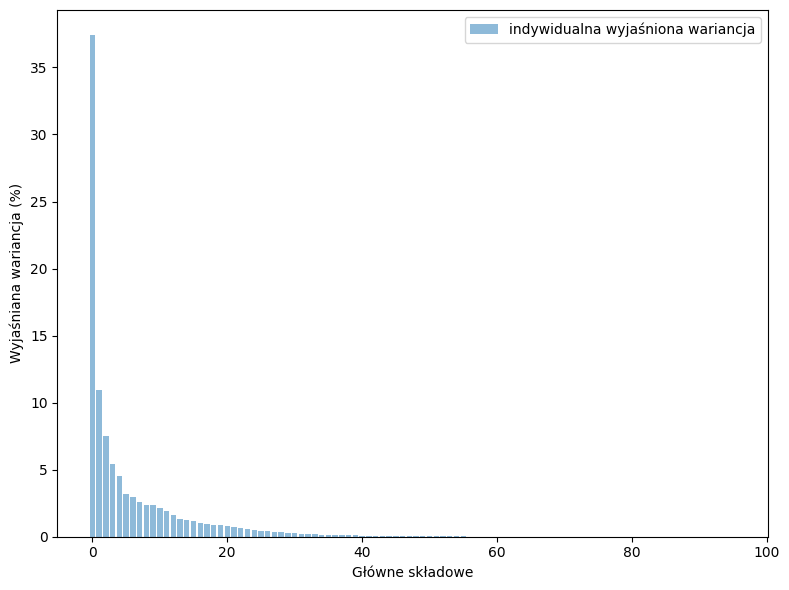

In [103]:
# Wyjaśniana wariancja przez każdy komponent
explained_variance = pca.explained_variance_ratio_

for i, exp_var in enumerate(explained_variance):
    print(f'Wariancja wyjaśniona przez główną składową {i+1}: {(exp_var*100).round(2)}%')

# Wykres wyjaśnionej wariancji
plt.figure(figsize=(8, 6))
plt.bar(range(len(explained_variance)), explained_variance*100, alpha=0.5, align='center', label='indywidualna wyjaśniona wariancja')
plt.ylabel('Wyjaśniana wariancja (%)')
plt.xlabel('Główne składowe')
plt.legend(loc='best')
plt.tight_layout()

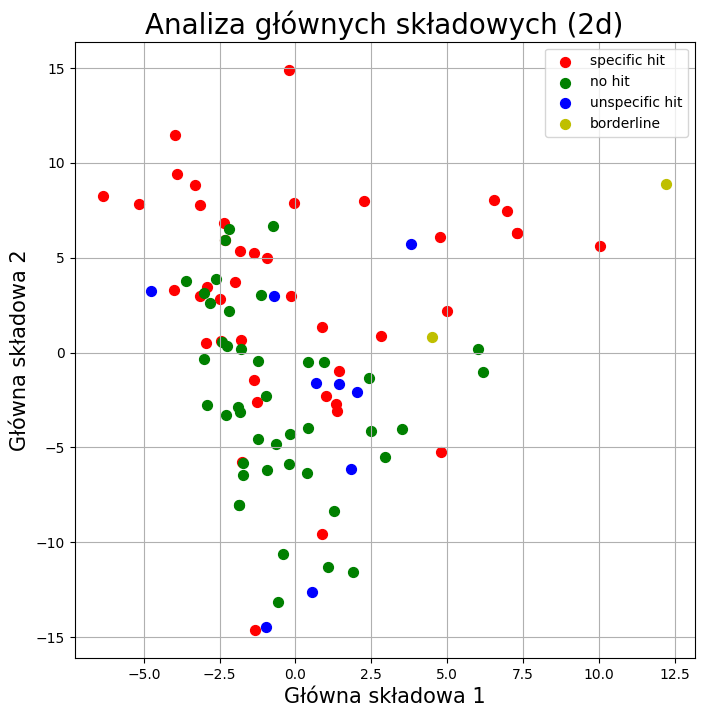

In [104]:
# Wykres dwóch pierwszych składowych głównych
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Główna składowa 1', fontsize = 15)
ax.set_ylabel('Główna składowa 2', fontsize = 15)
ax.set_title('Analiza głównych składowych (2d)', fontsize = 20)
#targets = ['Developmental toxicant', '?', 'Developmental NON-toxicant']
#colors = ['r','g','b']
#for target, color in zip(targets, colors):
#    indices_to_keep = df['Predicted Development Neurotoxicity'] == target
targets = ['specific hit', 'no hit', 'unspecific hit', 'borderline']
colors = ['r','g','b', 'y']
for target, color in zip(targets, colors):
    indices_to_keep = df['inne'] == target
    ax.scatter(principalComponents[indices_to_keep, 1], principalComponents[indices_to_keep, 0]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

In [231]:
pd.set_option('display.max_rows', None)

In [234]:
# utworzenie DataFrame dla głównych komponentów
pc_df = pd.DataFrame(data=principalComponents, 
                     columns=[f'Principal Component {i}' for i in range(1, principalComponents.shape[1] + 1)])

pc_3 = pc_df.loc[:, ['Principal Component 1', 'Principal Component 2', 'Principal Component 3']]
pc_3 = pd.concat([pc_3, df[['compound_name']], df[['inne']]], axis = 1)
pc_3.head()


,Principal Component 1,Principal Component 2,Principal Component 3,compound_name,inne
0,-13.345655,0.053651,3.678493,(-)-Nicotine,no hit
1,-17.271924,-2.127278,5.241265,1-Naphthol,specific hit
2,-2.795786,7.937897,21.818008,"2,2',4,4'-Tetrabromodiphenyl ether",specific hit
3,13.093994,9.947632,-5.930059,2-Ethylhexyl diphenyl phosphate,specific hit
4,8.050254,9.598654,11.146719,"3,3',5,5'-Tetrabromobisphenol A",specific hit


In [235]:
pc_3

,Principal Component 1,Principal Component 2,Principal Component 3,compound_name,inne
0,-13.345655,0.053651,3.678493,(-)-Nicotine,no hit
1,-17.271924,-2.127278,5.241265,1-Naphthol,specific hit
2,-2.795786,7.937897,21.818008,"2,2',4,4'-Tetrabromodiphenyl ether",specific hit
3,13.093994,9.947632,-5.930059,2-Ethylhexyl diphenyl phosphate,specific hit
4,8.050254,9.598654,11.146719,"3,3',5,5'-Tetrabromobisphenol A",specific hit
5,1.241363,-1.130391,2.149231,"5,5-Diphenylhydantoin",no hit
6,-23.657556,0.048170,0.541210,Acephate,no hit
7,-17.168178,-6.738718,0.838641,Acetaminophen,no hit
8,-8.146953,-2.609820,4.080325,Acetamiprid,no hit
9,-13.316896,-2.782856,11.857357,Acibenzolar-S-methyl,specific hit
